## Optimisation

In [123]:
# Optimization
import scipy.optimize as so

# Numerical Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

In [139]:
# Fix x values
x = np.arange(0.0, 21.0, 1.0)

# Fix y values
y = 5.0 * x + 10.0 + np.random.normal(0.0, 2.0, x.size)

# Print the values
x, y

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 array([ 12.10550828,  15.95621362,  17.48219028,  26.0991343 ,
         32.65584024,  35.26475187,  38.45018534,  44.83088229,
         48.69868483,  53.60126805,  60.88831741,  66.76730591,
         69.19254751,  75.68660104,  81.48578548,  83.65510058,
         89.96429134,  92.92140796, 101.73574034, 106.98507992,
        106.83272075]))

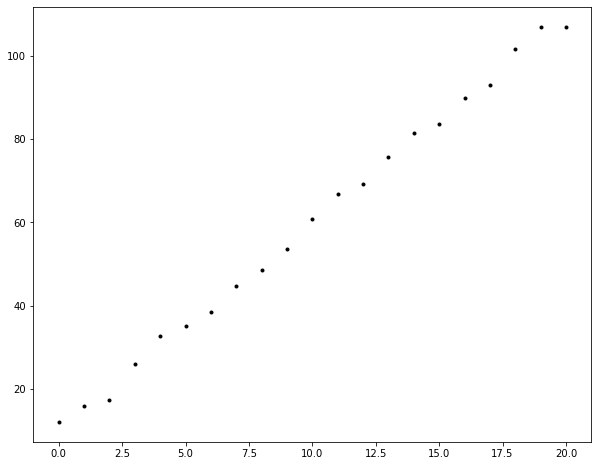

In [140]:
# Create a plot
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y, 'k.')

In [141]:
# Use minimize functuion in scipy.minimize
# First we need a function to minimize

# Here is the cost function
# Must take a SINGLE argument - but our cost function takes two(m and c)
# Put in arrey called MC to get around this
def cost(MC):
    # Unpack valuses for MC
    m, c = MC
    # Data points for the function
    cost = np.sum(( y- m * x - c)**2)
    return cost

In [142]:
# Run a test
cost((5.0, 10.0))

56.45795720572391

In [143]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
result = so.minimize(cost, (3,3))

# show the results
result

      fun: 54.602758681221616
 hess_inv: array([[ 0.00064935, -0.0064935 ],
       [-0.0064935 ,  0.08874454]])
      jac: array([ 4.76837158e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 4.95192467, 10.54073221])

In [144]:
m_o, c_o = result.x

m_o, c_o

(4.95192466725652, 10.54073221205151)

In [145]:
# analyical result
m_a, c_a = np.polyfit(x, y, 1)
m_a, c_a

(4.951924685234325, 10.540732068296098)

<function matplotlib.pyplot.show(close=None, block=None)>

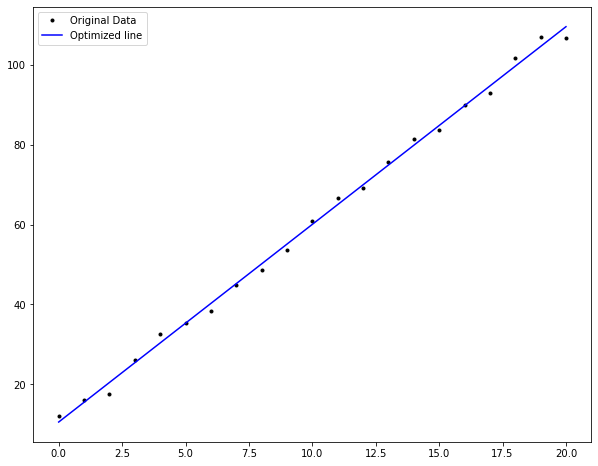

In [146]:
# Plot to best fit line from the optimization

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y, 'k.', label = "Original Data")
ax.plot(x, m_o * x + c_o,'b-', label = 'Optimized line')
#ax.plot(x, m_a * x + c_a,'r-', label = 'Analytical line')
ax.legend()

#show plot
plt.show

### Curve Fitting

***

In [147]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Curve_Fit
# Create the model function

def fun(x, m, c):
    return m * x + c


In [148]:
# Run curve_fit
result = so.curve_fit(fun, x, y)

In [149]:
#show result
result

(array([ 4.95192469, 10.54073207]),
 array([[ 0.00373225, -0.03732246],
        [-0.03732246,  0.5100736 ]]))

In [150]:
# Pull out Parameters
m_f, c_f = result[0]

# See values
m_f, c_f 

(4.951924685242947, 10.540732068316895)

<function matplotlib.pyplot.show(close=None, block=None)>

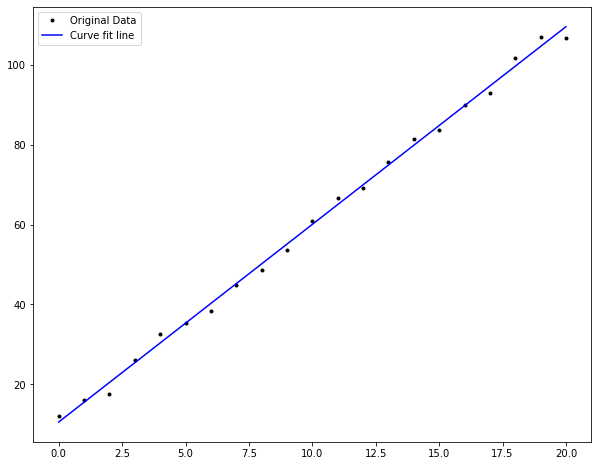

In [151]:
# Plot to best fit line from the optimization

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y, 'k.', label = "Original Data")
ax.plot(x, m_f * x + c_f,'b-', label = 'Curve fit line')
#ax.plot(x, m_a * x + c_a,'r-', label = 'Analytical line')
ax.legend()

#show plot
plt.show

### Parameters

***

In [152]:
# Generate a range of values
x = np.linspace(0.0, 10.0, 50)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [153]:
# Range of y values based on x
                    #this adds in the "noise"
y = 4.0 * x - 2.0 + np.random.normal(0.0, 1.0, len(x))
y

array([-1.6466772 , -0.46318758, -0.64628112,  0.05455148,  3.22091843,
        3.47956295,  2.52013884,  3.3702724 ,  3.44335696,  6.20543951,
        5.30447526,  6.97089318,  8.27843996,  8.99775845,  7.98574966,
       10.64789649, 10.96853314, 10.04591734, 13.20936739, 12.22154179,
       15.12798024, 12.89692081, 17.15037271, 17.19068429, 18.08979606,
       18.67207572, 18.50601152, 19.38151956, 21.60567973, 22.19391989,
       22.97065256, 23.17864342, 25.09045094, 26.52203201, 26.20092926,
       27.76181861, 27.9775536 , 28.62547569, 31.13130237, 30.90153956,
       30.28003347, 30.08470732, 32.98463535, 32.92971827, 33.72845187,
       34.87058566, 35.91500952, 36.51095485, 36.45163726, 37.87086835])

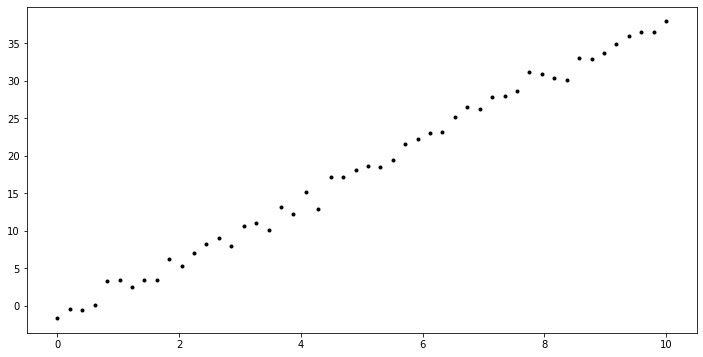

In [154]:
# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')

In [155]:
# use x and y to find original parameters used to create data
params = np.polyfit(x, y, 1)
params

array([ 4.01852428, -1.95320883])

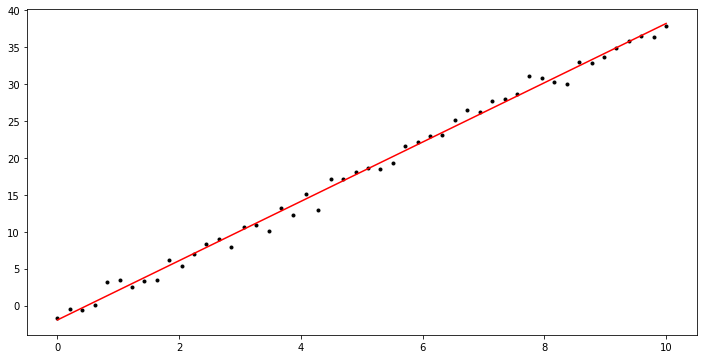

In [156]:
# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')

# PLot x and params on x
ax.plot(x, params[0] * x + params[1], 'r-')


In [157]:
# use x and y to find original parameters used to create data
params = np.polyfit(x, y, 2)
params

array([ 1.44260087e-03,  4.00409827e+00, -1.92965616e+00])

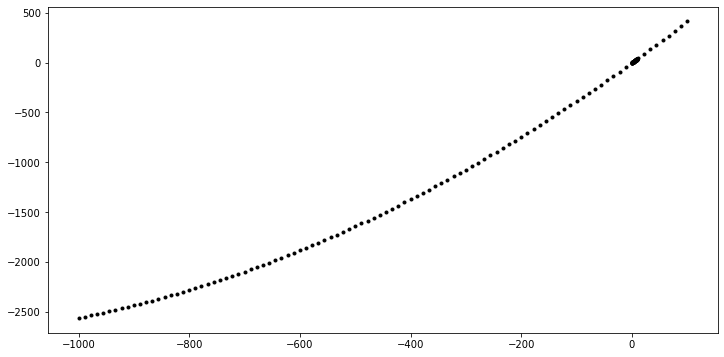

In [158]:
# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')

# Temp
xtmp = np.linspace(-1000.0, 100.0, 100)

# PLot x and params on x
ax.plot(xtmp, params[0] * xtmp**2 + params[1] * xtmp + params[2], 'k.')

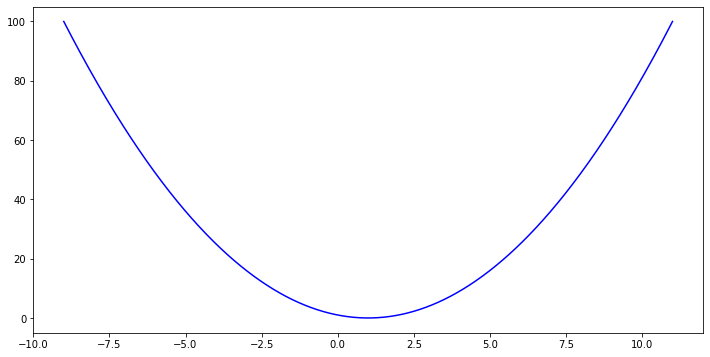

In [159]:
# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# Temp
xtmp = np.linspace(-9.0, 11.0, 1000)

# PLot x and params on x
ax.plot(xtmp, xtmp**2 - 2.0 * xtmp + 1.0, 'b-')

C:\Users\elyn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


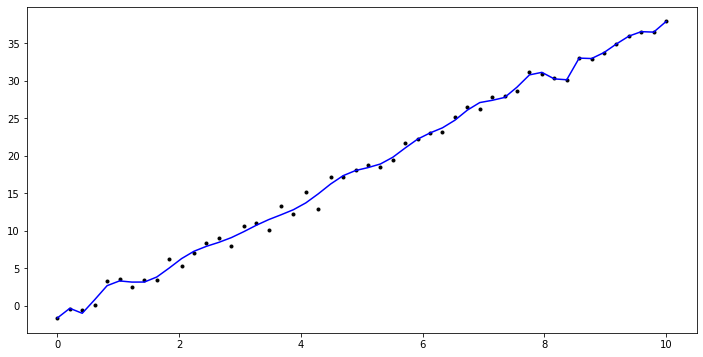

In [160]:
# Degrees of freedom
deg = 100

# Use x and y to try to find the original parameters
params = np.polyfit(x, y, deg)

# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

#plot x and y
ax.plot(x, y, 'k.')

# PLot x and params on x
ax.plot(x, np.polyval(params, x), 'b-')

Use numpy's polyfit to fit polynomials to the following two data sets.



In [161]:
# Data Set 1:
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]

# Data Set 2:
x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y1 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]

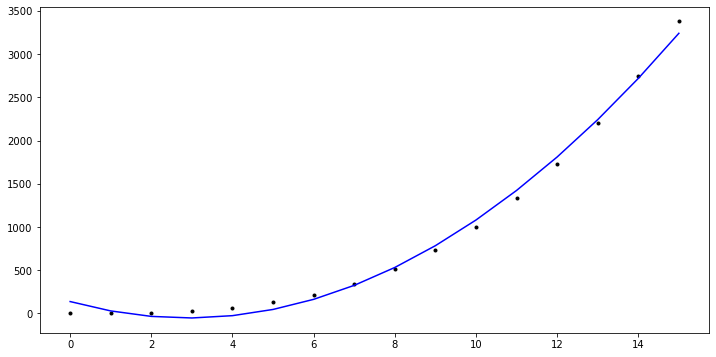

In [162]:
# Degrees of freedom
deg = 2

# Use x and y to try to find the original parameters
params = np.polyfit(x, y, deg)

# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

#plot x and y
ax.plot(x, y, 'k.')

# PLot x and params on x
ax.plot(x, np.polyval(params, x), 'b-')

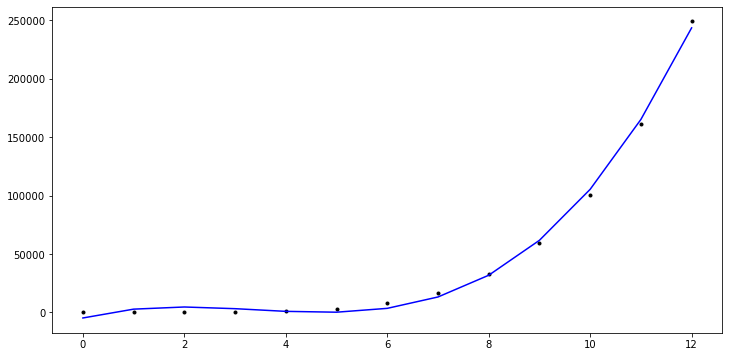

In [122]:
# Degrees of freedom
deg = 3

# Use x and y to try to find the original parameters
params = np.polyfit(x1, y1, deg)

# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

#plot x and y
ax.plot(x1, y1, 'k.')

# PLot x and params on x
ax.plot(x1, np.polyval(params, x1), 'b-')